In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
ss = pd.read_csv('sample_submission.csv')
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [75]:
ss.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [76]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [78]:
train_df  = train.copy()
test_df = test.copy()

In [79]:
train_df.shape ,test_df.shape

((1460, 81), (1459, 80))

Checking columns headings are same in both datasets?

In [80]:
diff_cols1 = [x for x in train_df.columns if x not in test_df.columns]
print('columns present in train_df and absent in test_df is : {}'.format(diff_cols1))

diff_cols2 = [x for x in test_df.columns if x not in train_df.columns]
print('columns present in train_df and absent in test_df is : {}'.format(diff_cols2))

columns present in train_df and absent in test_df is : ['SalePrice']
columns present in train_df and absent in test_df is : []


Only SalePrice is different in both dataset that is not in test_df . this is the columns we have to predict

### Missing values

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [83]:
a= (train_df.isna().sum() * 100 / len(train_df)).reset_index()
a.columns= ['col_name' , 'per_missing']
a = a.sort_values(ascending = False , by = 'per_missing') 
a[0:10] 

,col_name,per_missing
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945


In [84]:
b= (test_df.isna().sum() * 100 / len(test_df)).reset_index()
b.columns= ['col_name' , 'per_missing']
b.sort_values(ascending = False , by = 'per_missing')[0:10]  

,col_name,per_missing
72,PoolQC,99.794380
74,MiscFeature,96.504455
6,Alley,92.666210
73,Fence,80.123372
57,FireplaceQu,50.034270
3,LotFrontage,15.558602
59,GarageYrBlt,5.346127
63,GarageQual,5.346127
60,GarageFinish,5.346127
64,GarageCond,5.346127


In [85]:
train_df.drop(labels = ['Id' ,'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'] , axis = 1 , inplace = True)
test_df.drop(labels = ['Id' , 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'] ,  axis = 1 , inplace = True)

In [86]:
train_df.shape , test_df.shape

((1460, 74), (1459, 73))

In [87]:
train_df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Numericals Columns

In [88]:
train_df.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 74, dtype: object

In [89]:
train_df_num = train_df.select_dtypes(exclude = ['object'])
test_df_num = test_df.select_dtypes(exclude = ['object'])
train_df_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


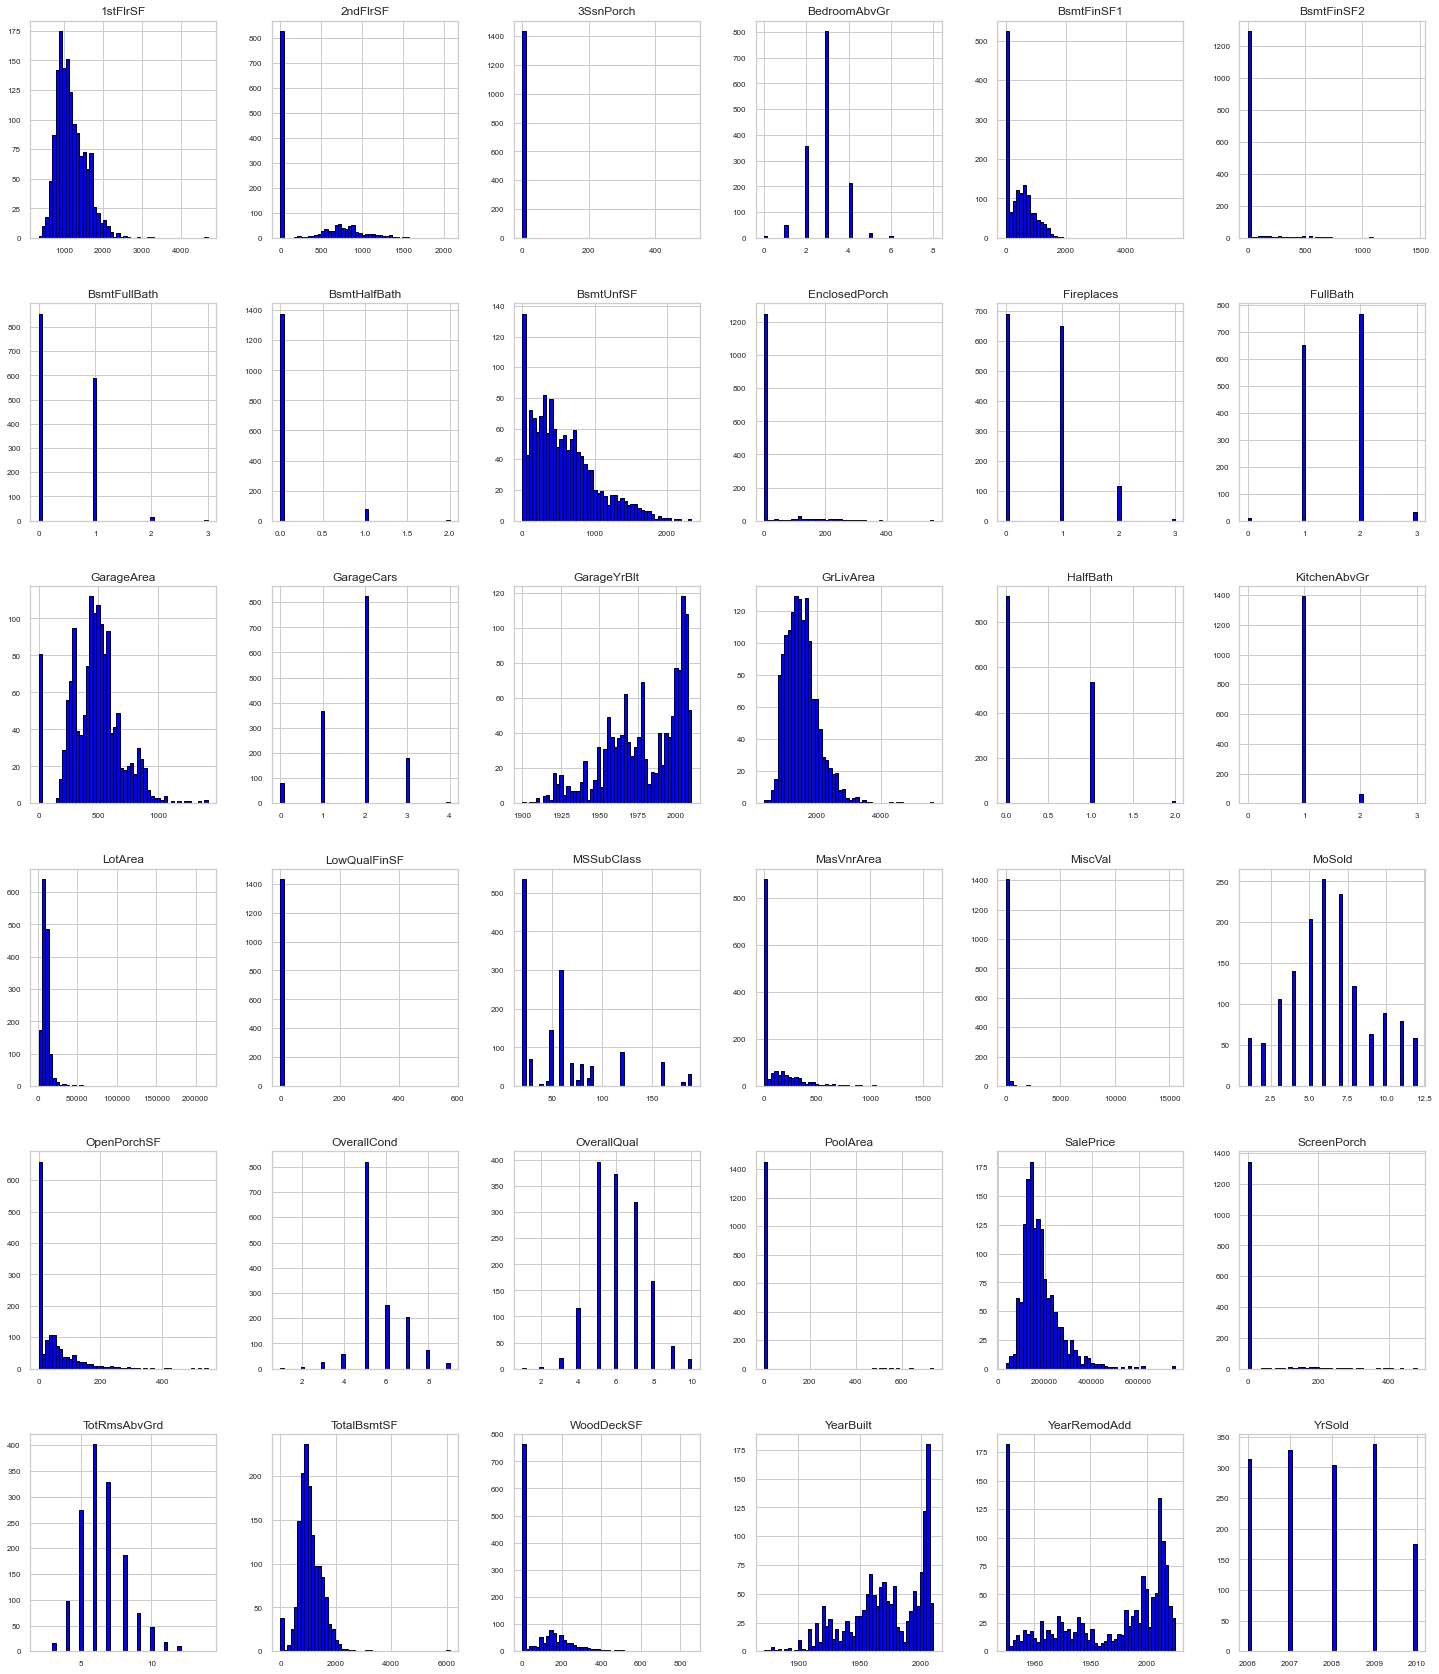

In [90]:
train_df_num.hist(figsize=(25, 30), bins=50, color="blue", edgecolor="black", xlabelsize=8, ylabelsize=8)
plt.show()

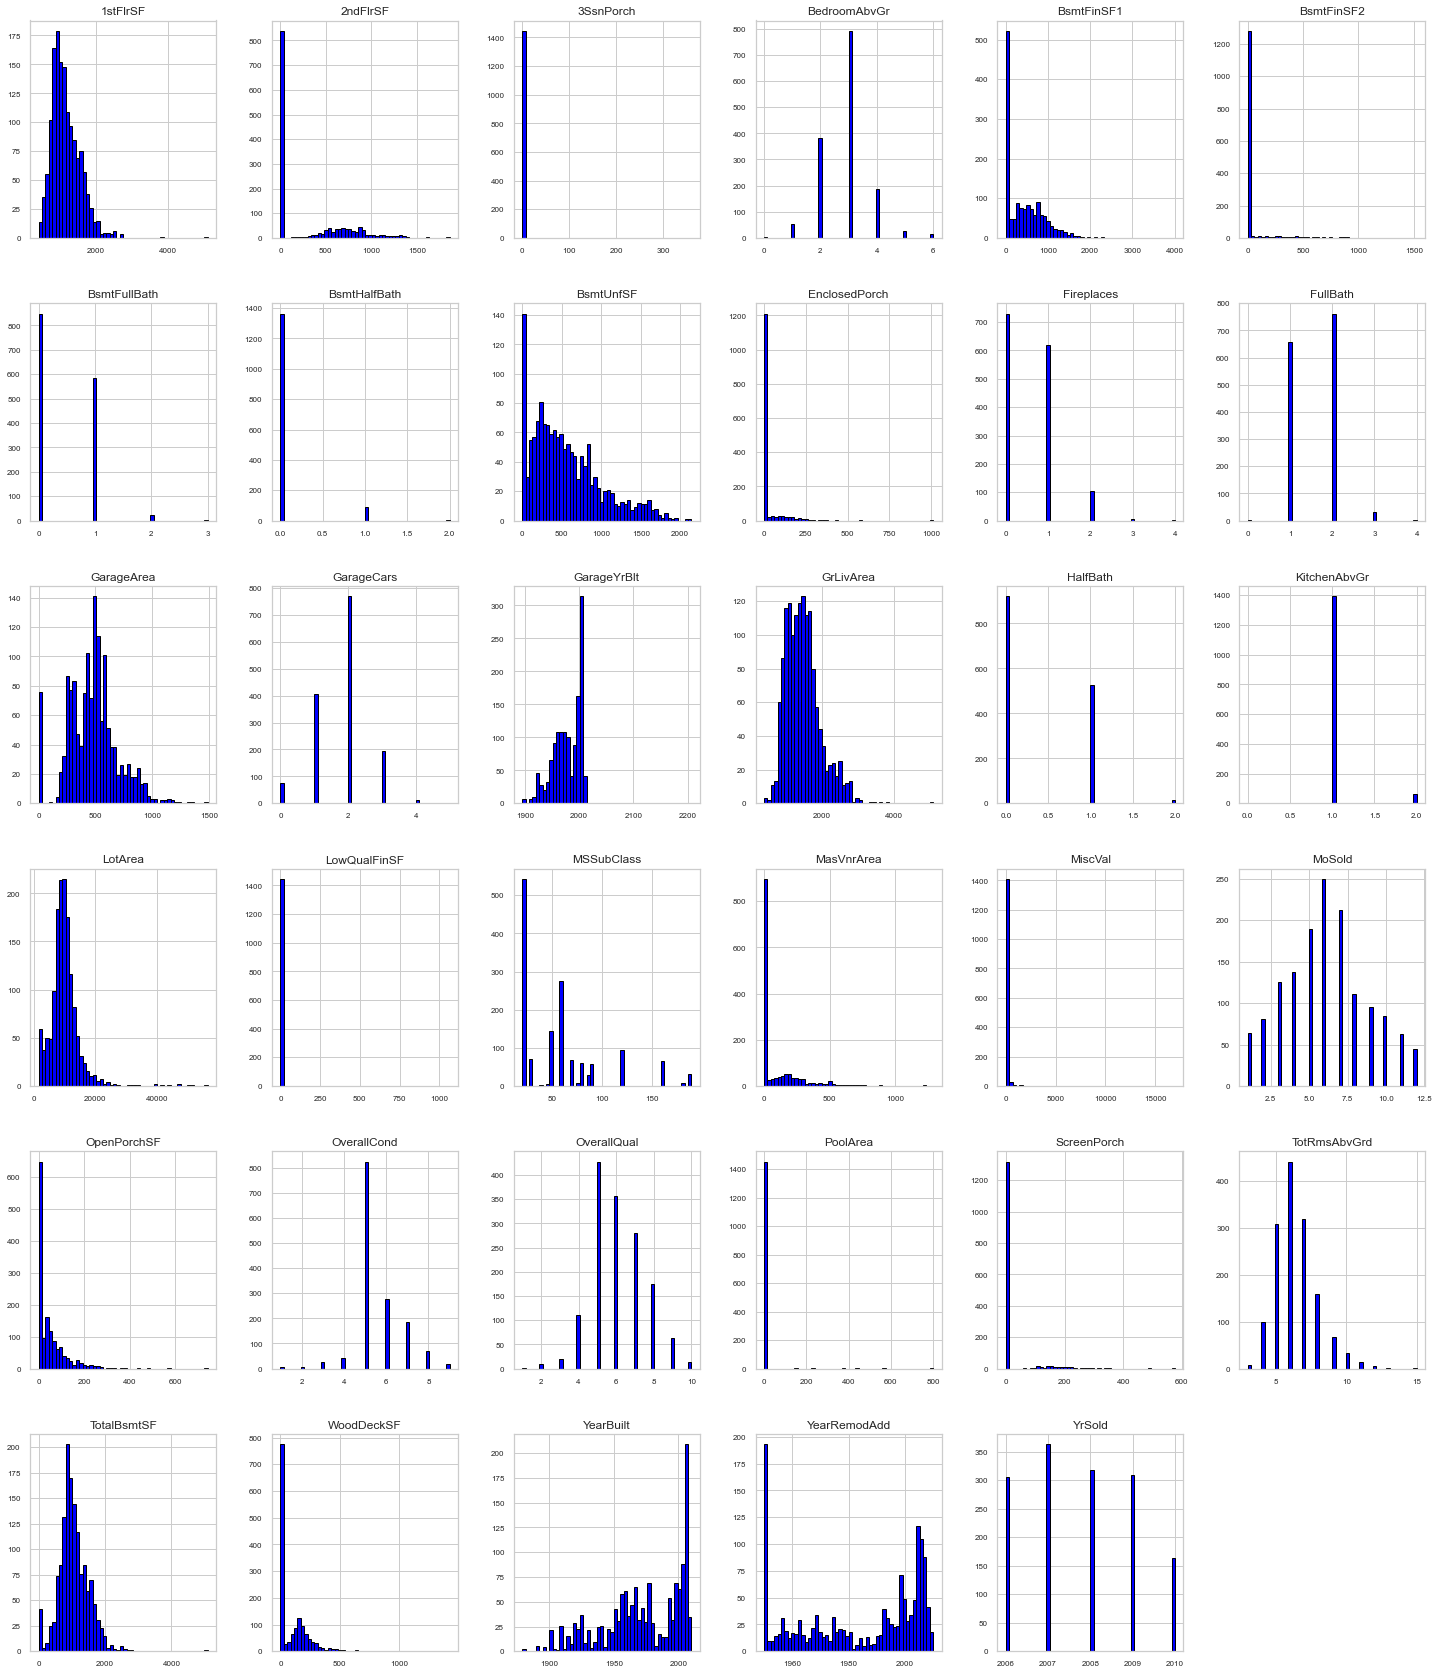

In [91]:
test_df_num.hist(figsize=(25, 30), bins=50, color="blue", edgecolor="black", xlabelsize=8, ylabelsize=8)
plt.show()

In [92]:
train_df['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [93]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.05)
selector.fit(train_df_num.iloc[ : , :-1 ])
quasi_const_features = len(train_df_num.iloc[ : , :-1 ].columns)- sum(selector.get_support())
print('no. of quasi const featues:{}'.format(quasi_const_features))

no. of quasi const featues:1


VarianceThreshold will ignores those values in which 95% values are same or consatant 
1. `selector.get_support()` True,  True,  True, False, <false for constant features columns
2. `train_df_num.iloc[:, :-1].columns[selector.get_support()]` #this returns retained columns means selected columns 
                                                              

In [94]:
quasi_constant_features_list =  [x for x in train_df_num.iloc[:, :-1] if x not in train_df_num.iloc[:, :-1].columns[selector.get_support()] ]
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: ['KitchenAbvGr']


In [95]:
train_df_num.drop(quasi_constant_features_list, axis=1, inplace=True)
test_df_num.drop(quasi_constant_features_list, axis=1, inplace=True)

In [96]:
train_df_num.shape , test_df_num.shape

((1460, 35), (1459, 34))

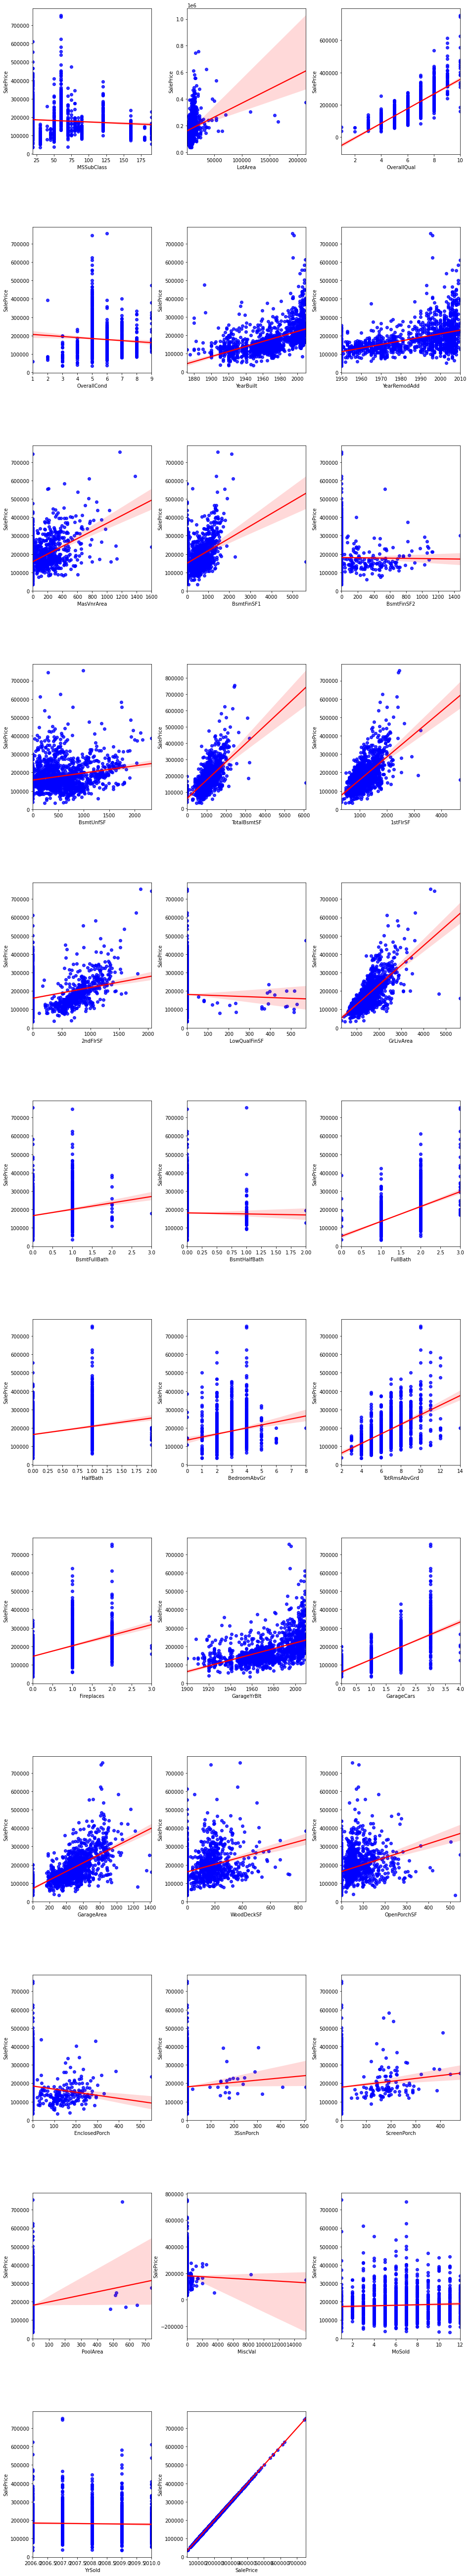

In [25]:
plt.figure(figsize = (15,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i , col in enumerate(train_df_num.columns):
#     print(i , col)
    plt.subplot(15 , 3 , i+1)
    sns.regplot(x=col , y='SalePrice' , data= train_df_num ,  scatter_kws={'color': 'blue'},
    line_kws={'color' : 'red'})

1.Scatter plot only show linear relationship between x and y. it doesn't tell that if we increase some specific parameters then saels price increae

### Correlation

In [97]:
corr_matrix = train_df_num.corr() 
corr_matrix[(corr_matrix<0.3) & (corr_matrix>-0.3)]  = 0 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

<AxesSubplot:>

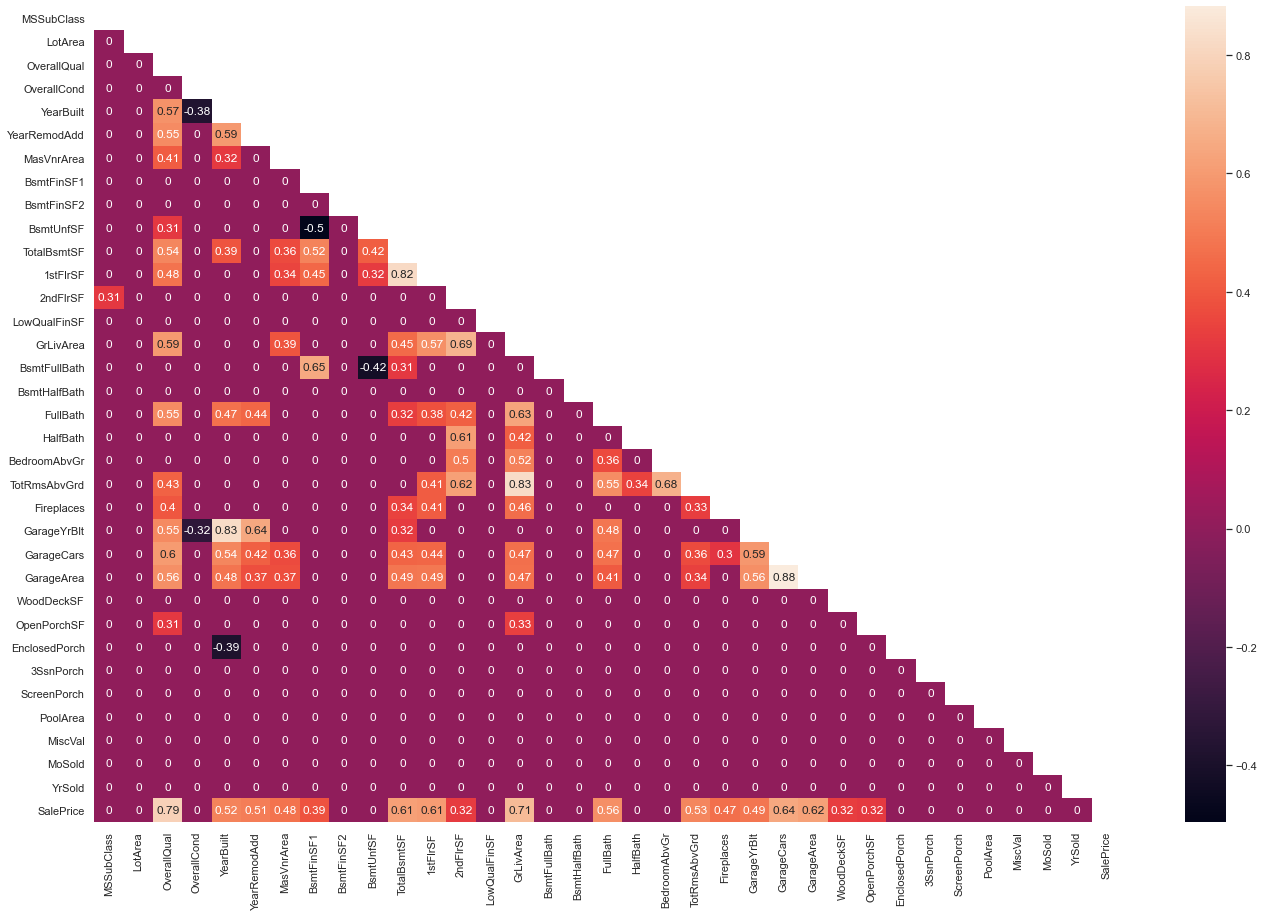

In [98]:
plt.figure(figsize = (23,15))
sns.heatmap(corr_matrix , mask = mask , annot = True)

### Strengh of relationship

- |r| < 0.3  ⇒  None or Very Weak
- 0.3 < |r| < 0.5  ⇒  Weak
- 0.5 < |r| < 0.7  ⇒  Moderate
- |r| > 0.7  ⇒  Strong


Correlation around 0.7 or above suggest a strong relationship and only one of the two variables is needed in the analysis. This need to be dealt with when adressing the features selection.

Thus, we will look at two kinds of correlation: Those between the variable of interest and the predictors and those within independent variables.

As a result, we can deduce that there is a strong linear relationship between the sale price, our target variable and predictors cited in a descent order:

 The overall quality of the material used and the finished house, which is without a doubt of shadow obvious.
 The living area above grade or ground,
Also, 8 predictors are moderately correlated with the dependent variable. To mention only a few:

- The size of garage in car capacity, looks like people care a lot about their cars confort :),
- The size of garage which was predicatable based on the previous customers expectation,
- The total square feet of basement erea,
- The first floor square feet,
- etc.
 
 Finally, we are left with 8 weakly correlated predictors for a cut-off value equals 30% namely:

- Year garage was built,
- Masonry veneer area,
- Number of fireplaces,
- Type 1 finished,
- etc.

As for the second type of correlation we are interested in, we have a very strong positive correlation (of at least 0.7) including variable below also lined up in a descent order:

- "GarageArea" and "GarageCars"
- "GarageYrBlt" and "YearBuilt"
- "TotRmsAbvGrd" and "GrLivArea"
- "1stFlrSF" and "TotalBsmtSF"

We recall that:

- "GarageYrBlt" stands for the year the garage was build,
- "YearBuilt" is the original construction date,
- "TotRmsAbvGrd" is the total rooms above grade not including the bathrooms.


### Correlation of Numericals Features

In [99]:
corr = train_df_num.corr()['SalePrice']
strongly_featutes_list = corr[corr > 0.7].index.tolist()[0:-1]
moderate_features_list = corr[(corr  > 0.5) & (corr < 0.7)].index.tolist()
weakly_correlated_features_list = corr[(corr  > 0.3) & (corr <=0.5)].index.tolist()

### Strongly Correlated features

Highly Correlated Features
OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64


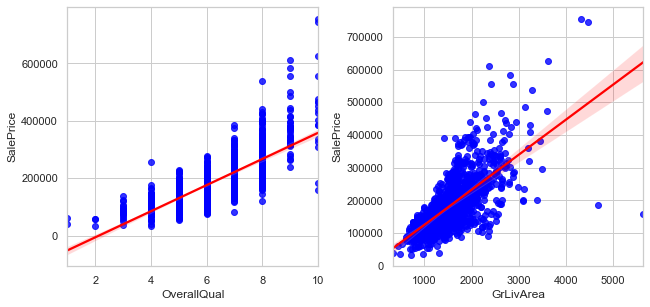

In [100]:
plt.figure(figsize = (10,2))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5 )
print('Highly Correlated Features')
print(corr[corr >=0.7][0:-1].sort_values(ascending = False))
for i , col in enumerate(strongly_featutes_list):
    plt.subplot(1,2,i+1)
    sns.regplot(x=col , y = 'SalePrice' , data = train_df_num ,scatter_kws={'color':'blue'},
    line_kws={'color':'red'}, )   

### Moderate Correlated Features

moderate Correlated Features
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


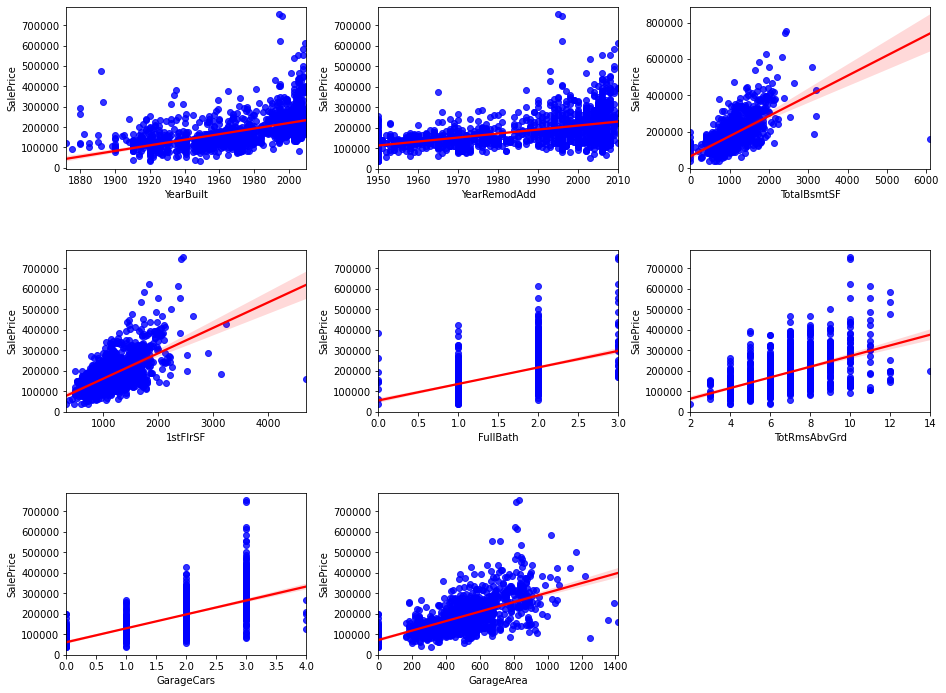

In [30]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5 )
print('moderate Correlated Features')
print(corr[(corr  > 0.5) & (corr < 0.7)].sort_values(ascending = False))

for i , col in enumerate(moderate_features_list):
    plt.subplot(3,3,i+1)
    sns.regplot(x=col , y = 'SalePrice' , data = train_df_num ,scatter_kws={'color':'blue'},
    line_kws={'color':'red'}, )  

### Weakly Correlated Features 

moderate Correlated Features
GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64


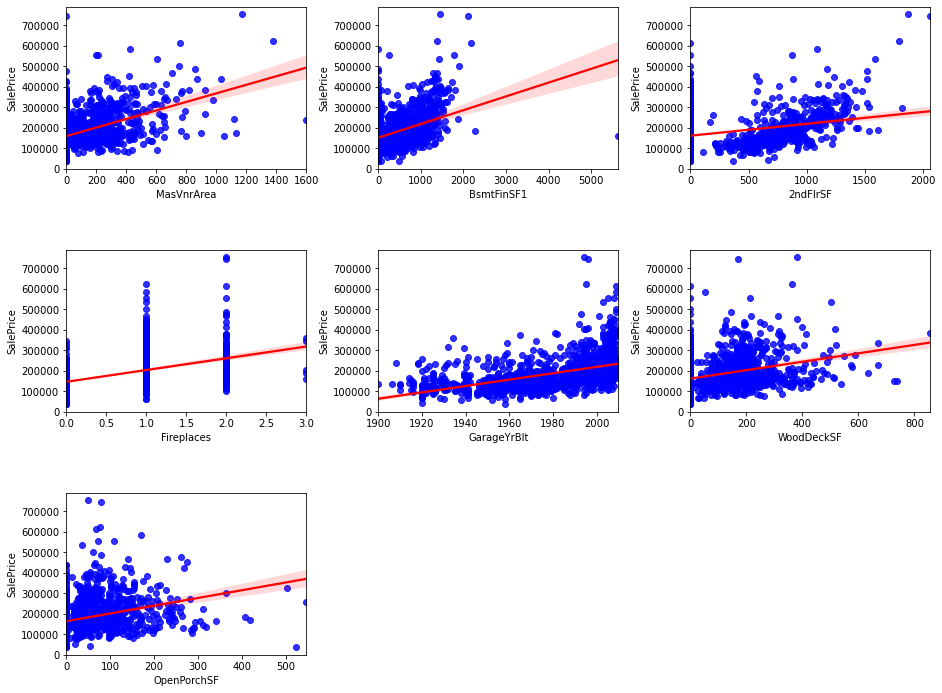

In [31]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5 )
print('moderate Correlated Features')
print(corr[(corr  > 0.3) & (corr < 0.5)].sort_values(ascending = False))

for i , col in enumerate(weakly_correlated_features_list):
    plt.subplot(3,3,i+1)
    sns.regplot(x=col , y = 'SalePrice' , data = train_df_num ,scatter_kws={'color':'blue'},
    line_kws={'color':'red'}, )  

In [32]:
train_df_num.shape

(1460, 35)

In [33]:
len(strongly_featutes_list) + len(moderate_features_list) + len(weakly_correlated_features_list)

17

#### Remove those features which are weakly correleated (correletion below 0.3)

In [73]:
test_df_num 

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF
0,5,896,1961,1961,882.0,896,1,5,1.0,730.0,0.0,468.0,0,0,1961.0,140,0


In [102]:
list_of_num_features = strongly_featutes_list + moderate_features_list + weakly_correlated_features_list
list_of_num_features.append('SalePrice')
train_df_num=train_df_num.loc[:, list_of_num_features] 
test_df_num = test_df_num.loc[: , list_of_num_features[ : -1]]
train_df_num.shape , test_df_num.shape

((1460, 18), (1459, 17))

In [103]:
train_df_col_nan =train_df_num.columns[train_df_num.isnull().any()]

Text(0, 0.5, 'Column Name\n')

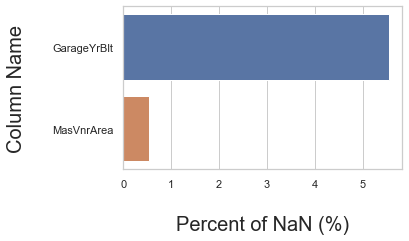

In [104]:
# per_nan_col 
plt.figure(figsize= (5,3))
train_per_missings = train_df_num.isnull().sum() *100 / len(train_df_num)
train_per_missings = train_per_missings[train_df_col_nan].sort_values(ascending = False).reset_index()
train_per_missings.columns = ['col' , 'per_miss_values']
p = sns.barplot(x = 'per_miss_values' , y =  'col', data = train_per_missings )
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

### Imputing numericals Values

In [105]:
from sklearn.impute import SimpleImputer

In [106]:
# train_df_num_copy = train_df_num.copy()
imputer = SimpleImputer(strategy='median', 
                        missing_values=np.nan)
imputer = imputer.fit(train_df_num)
train_df_num_imputed = imputer.transform(train_df_num)
train_df_num_imputed = pd.DataFrame(train_df_num_imputed)
train_df_num_imputed.columns = train_df_num.columns
train_df_num_imputed.head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,1710.0,2003.0,2003.0,856.0,856.0,2.0,8.0,2.0,548.0,196.0,706.0,854.0,0.0,2003.0,0.0,61.0,208500.0
1,6.0,1262.0,1976.0,1976.0,1262.0,1262.0,2.0,6.0,2.0,460.0,0.0,978.0,0.0,1.0,1976.0,298.0,0.0,181500.0
2,7.0,1786.0,2001.0,2002.0,920.0,920.0,2.0,6.0,2.0,608.0,162.0,486.0,866.0,1.0,2001.0,0.0,42.0,223500.0
3,7.0,1717.0,1915.0,1970.0,756.0,961.0,1.0,7.0,3.0,642.0,0.0,216.0,756.0,1.0,1998.0,0.0,35.0,140000.0
4,8.0,2198.0,2000.0,2000.0,1145.0,1145.0,2.0,9.0,3.0,836.0,350.0,655.0,1053.0,1.0,2000.0,192.0,84.0,250000.0


The next step is now to look at the distibutions of these features before and after imputation.

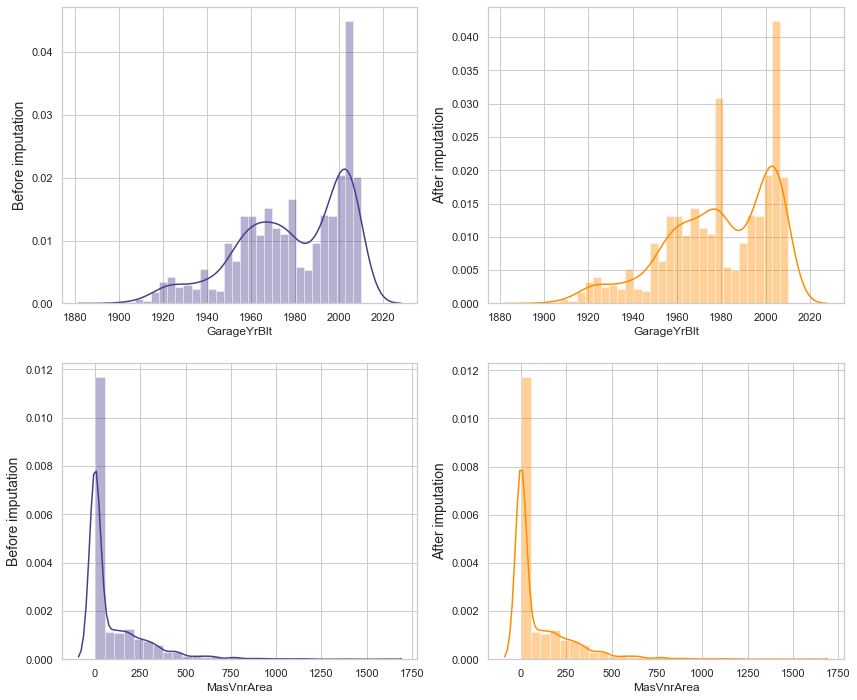

In [69]:
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["GarageYrBlt", "MasVnrArea"], [0, 1]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.distplot( train_df_num[feature] ,ax=axes[fig_pos, 0] ,
                     kde=True, bins=30, color="darkslateblue")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.distplot(train_df_num_imputed[feature] ,ax=axes[fig_pos, 1] , kde=True, bins=30, color="darkorange")
    q.set_ylabel(f"After imputation", fontsize=14)

No major change in the shape of the distributions. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation. Hence, the imputation operation is a success.

In [108]:
test_df_col_nan =test_df_num.columns[ test_df_num.isnull().any()]

Text(0, 0.5, 'Column Name\n')

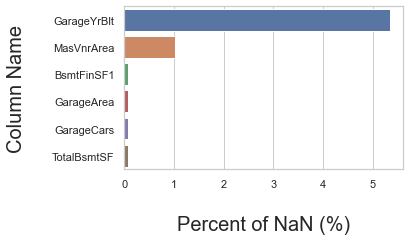

In [109]:
# per_nan_col 
plt.figure(figsize= (5,3))
test_per_missings = (test_df_num.isnull().sum() * 100) / len(test_df_num)
test_per_missings = test_per_missings[test_df_col_nan].sort_values(ascending = False).reset_index()
test_per_missings.columns = ['col' , 'per_miss_values']
q = sns.barplot(x = 'per_miss_values' , y =  'col', data = test_per_missings )
q.set_xlabel("\nPercent of NaN (%)", fontsize=20)
q.set_ylabel("Column Name\n", fontsize=20)

In conntrast to the training set, here we have nine features containing missing values in their observations. The highest one is the masonry veneer area (about 1%). So, let's apply the same procedure, that's imputation by the median

### Imputation in test data


In [110]:
my_imputer = SimpleImputer(strategy="median")
test_df_num_imputed = pd.DataFrame(my_imputer.fit_transform(test_df_num))
test_df_num_imputed.columns = test_df_num.columns
test_df_num_imputed.head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF
0,5.0,896.0,1961.0,1961.0,882.0,896.0,1.0,5.0,1.0,730.0,0.0,468.0,0.0,0.0,1961.0,140.0,0.0
1,6.0,1329.0,1958.0,1958.0,1329.0,1329.0,1.0,6.0,1.0,312.0,108.0,923.0,0.0,0.0,1958.0,393.0,36.0
2,5.0,1629.0,1997.0,1998.0,928.0,928.0,2.0,6.0,2.0,482.0,0.0,791.0,701.0,1.0,1997.0,212.0,34.0
3,6.0,1604.0,1998.0,1998.0,926.0,926.0,2.0,7.0,2.0,470.0,20.0,602.0,678.0,1.0,1998.0,360.0,36.0
4,8.0,1280.0,1992.0,1992.0,1280.0,1280.0,2.0,5.0,2.0,506.0,0.0,263.0,0.0,0.0,1992.0,0.0,82.0


<Figure size 1440x2304 with 0 Axes>

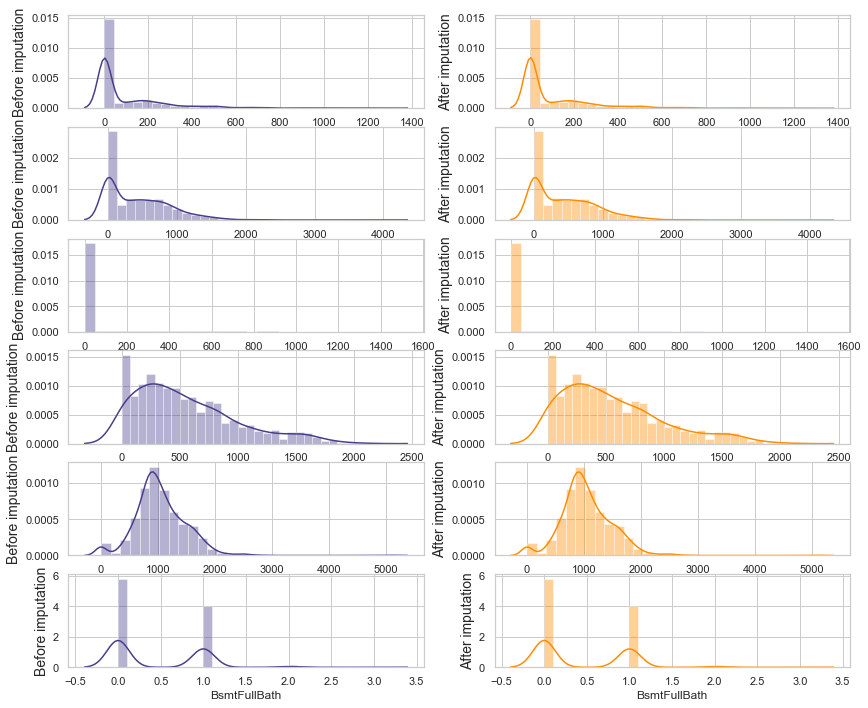

In [44]:
plt.figure(figsize = (20, 32))
sns.set_style("whitegrid")
fig, axes = plt.subplots(6, 2)

# Plot the results
for feature, fig_pos in zip(test_df_col_nan, range(0,6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.distplot( test_df_num[feature] ,ax=axes[fig_pos, 0] ,
                     kde=True, bins=30, color="darkslateblue")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.distplot( test_df_num_imputed[feature] ,ax=axes[fig_pos, 1] , kde=True, bins=30, color="darkorange")
    q.set_ylabel(f"After imputation", fontsize=14)

No major change in the shape of the distributions. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation. Hence, the imputation operation is a success.

In [111]:
train_df_num_imputed.shape , test_df_num_imputed.shape

((1460, 18), (1459, 17))

In [112]:
diff_1 = [col for col in train_df_num_imputed if col not in test_df_num_imputed]
diff_1

['SalePrice']

In [113]:
len(train_df_cat.columns) , len(test_df_cat.columns)


(38, 38)

### Missing values in categoricals data

In [114]:
train_df_cat= train_df.select_dtypes(include = ['object'])
test_df_cat = test_df.select_dtypes(include = ['object'])
train_df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [115]:
train_df_cat_col_nan =train_df_cat.columns[ train_df_cat.isnull().any()]
test_df_cat_col_nan =test_df_cat.columns[ test_df_cat.isnull().any()]

Text(0, 0.5, 'Column Name\n')

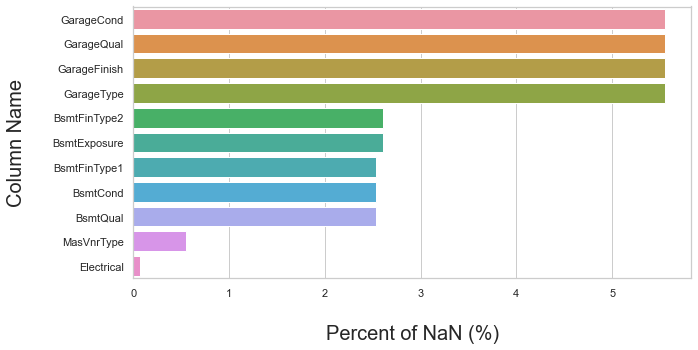

In [116]:
# per_nan_col 
train_per_missings = train_df_cat.isnull().sum() *100 / len(train_df_cat)
train_per_missings = train_per_missings[train_df_cat_col_nan].sort_values(ascending = False).reset_index()
train_per_missings.columns = ['col' , 'per_miss_values']
plt.figure(figsize = (10,5))
p = sns.barplot(x = 'per_miss_values' , y =  'col', data = train_per_missings )
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Filling missings values with most frequenst 

In [117]:
#Imputation in train data
my_imputer = SimpleImputer(strategy="most_frequent")
train_df_cat_imputed = pd.DataFrame(my_imputer.fit_transform(train_df_cat))
train_df_cat_imputed.columns = train_df_cat.columns
train_df_cat_imputed.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [118]:
((test_df_cat.isnull().sum()) * 100 / len(test_df_cat)).sort_values(ascending = False) 

GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType2     2.878684
BsmtFinType1     2.878684
MasVnrType       1.096642
MSZoning         0.274160
Utilities        0.137080
Functional       0.137080
KitchenQual      0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
LotConfig        0.000000
BldgType         0.000000
LandContour      0.000000
LotShape         0.000000
LandSlope        0.000000
Neighborhood     0.000000
Street           0.000000
Condition1       0.000000
Condition2       0.000000
SaleCondition    0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
ExterQual        0.000000
Foundation       0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000000
PavedDrive       0.000000
ExterCond        0.000000
dtype: float

Text(0, 0.5, 'Column Name\n')

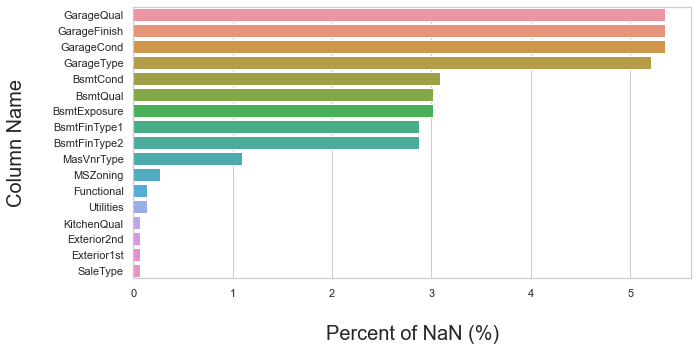

In [119]:
# per_nan_col 
test_per_missings = test_df_cat.isnull().sum() *100 / len(test_df_cat)
test_per_missings = test_per_missings[test_df_cat_col_nan].sort_values(ascending = False).reset_index()
test_per_missings.columns = ['col' , 'per_miss_values']
plt.figure(figsize = (10,5))
p = sns.barplot(x = 'per_miss_values' , y =  'col', data = test_per_missings )
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [120]:
#Imputation in test data
my_imputer = SimpleImputer(strategy="most_frequent")
test_df_cat_imputed = pd.DataFrame(my_imputer.fit_transform(test_df_cat))
test_df_cat_imputed.columns = test_df_cat.columns
test_df_cat_imputed.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

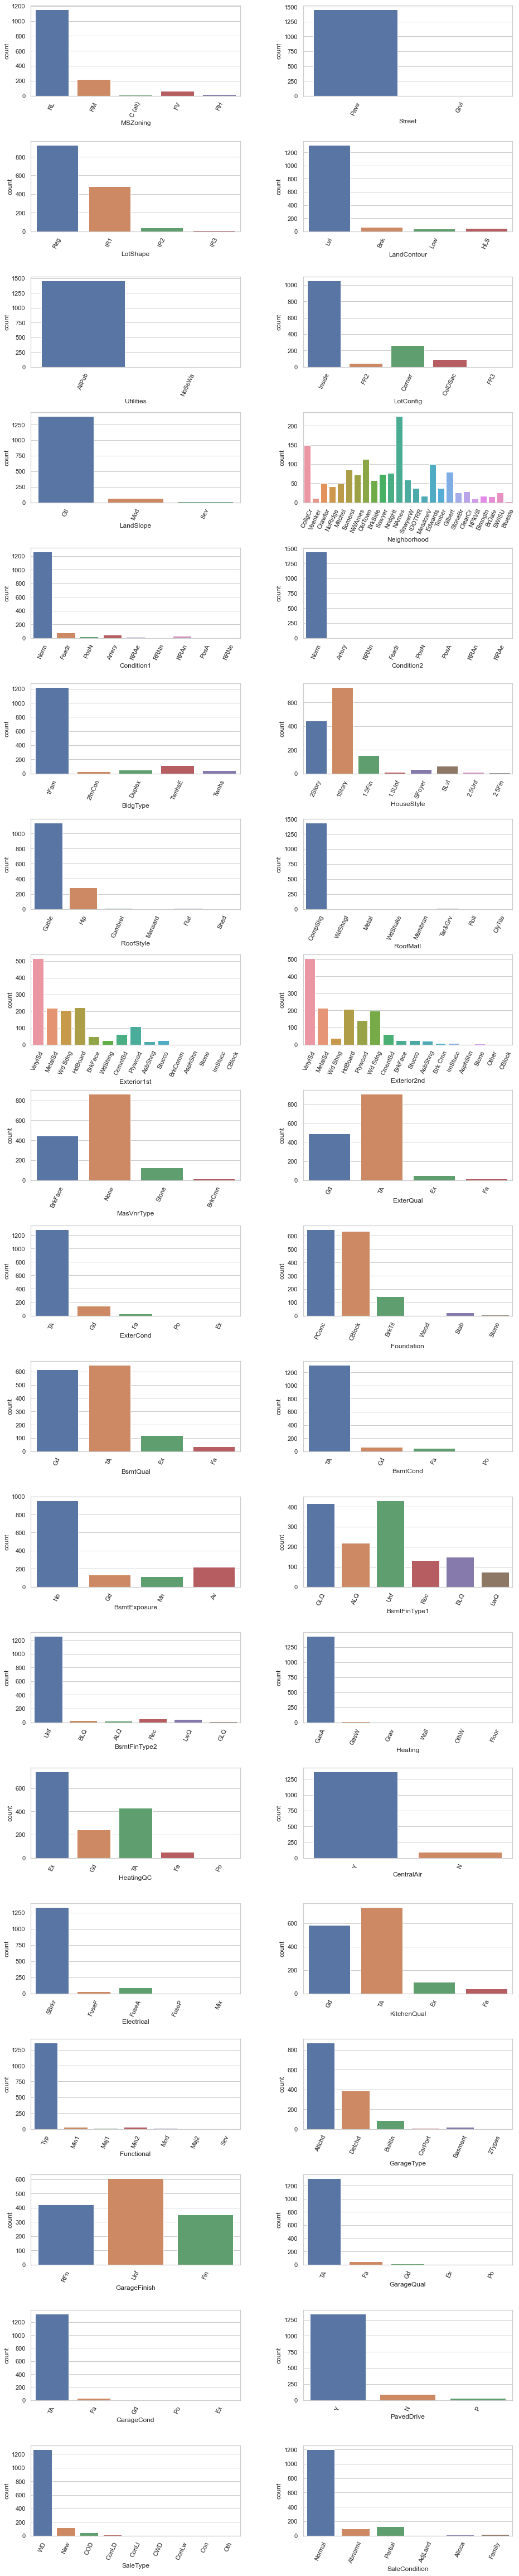

In [55]:
plt.figure(figsize = (15,35))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5 )
for i , col in enumerate(train_df_cat.columns):
    plt.subplot(len(train_df_cat.columns) / 2 , 2 ,i+1)
    sns.countplot(x = col , data = train_df_cat ) 
    plt.xticks(rotation = 65)

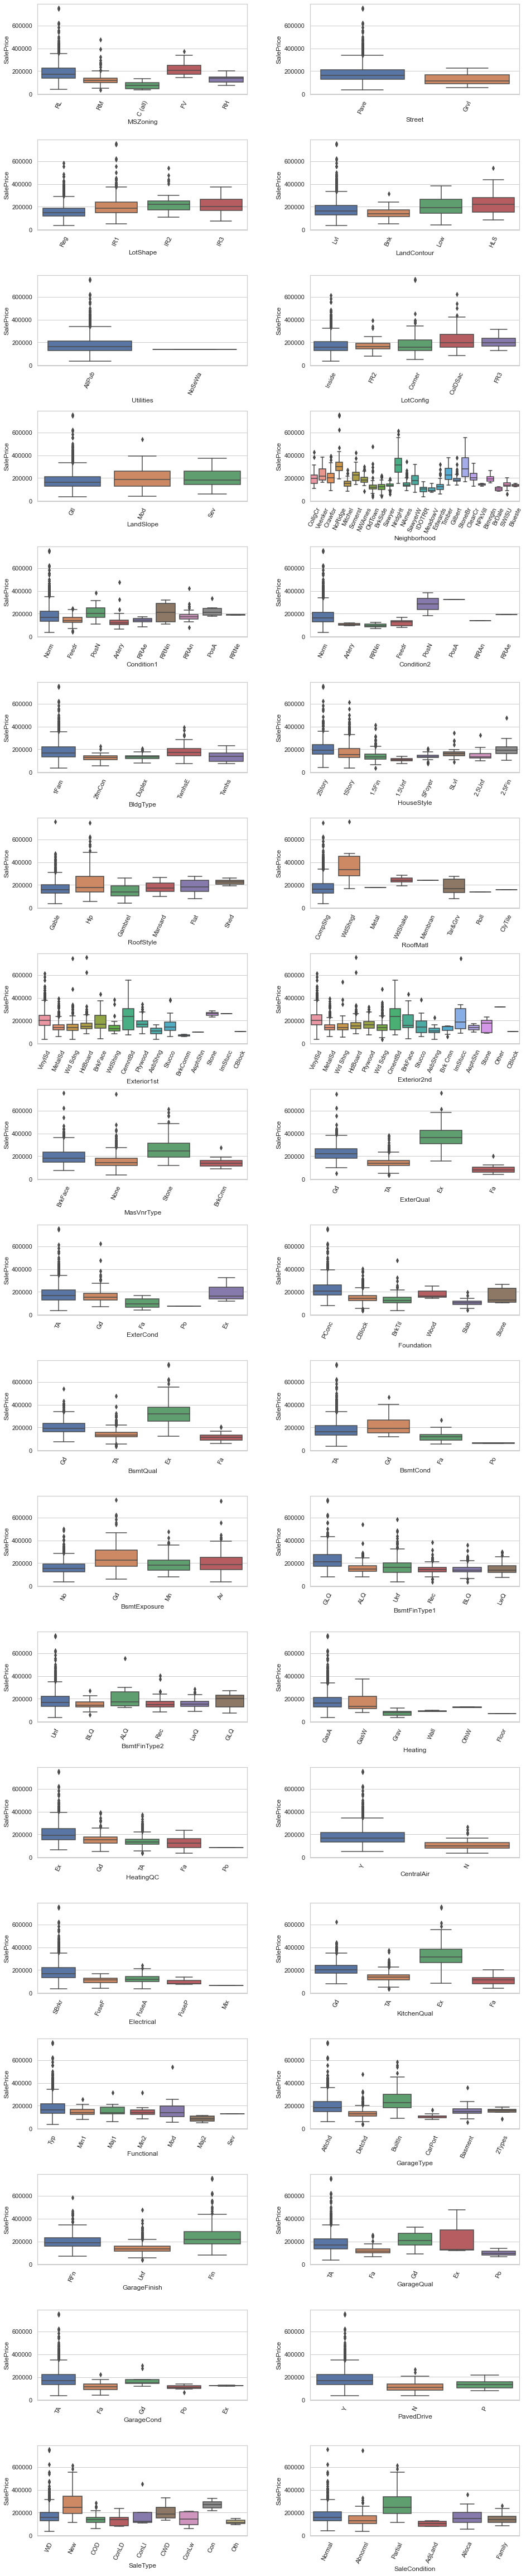

In [56]:
plt.figure(figsize = (15,35))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5 )
for i , col in enumerate(train_df_cat.columns):
    plt.subplot(len(train_df_cat.columns) / 2 , 2 ,i+1)
    sns.boxplot(x = col , y = 'SalePrice' , data = train_df)  
    plt.xticks(rotation = 65) 

In [121]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'Exterior2nd' , 
    'ExterCond' , 
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive' , 
    'BsmtExposure' , 
]
train_df_cat_imputed.drop(cols_to_drop , axis = 1 , inplace = True)
test_df_cat_imputed.drop(cols_to_drop , axis = 1 , inplace = True)


X = ["Exterior1st", "ExterQual", "BsmtQual"]

Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

These both X and Y have similar data


In [122]:
train_df_num_imputed.head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,1710.0,2003.0,2003.0,856.0,856.0,2.0,8.0,2.0,548.0,196.0,706.0,854.0,0.0,2003.0,0.0,61.0,208500.0
1,6.0,1262.0,1976.0,1976.0,1262.0,1262.0,2.0,6.0,2.0,460.0,0.0,978.0,0.0,1.0,1976.0,298.0,0.0,181500.0
2,7.0,1786.0,2001.0,2002.0,920.0,920.0,2.0,6.0,2.0,608.0,162.0,486.0,866.0,1.0,2001.0,0.0,42.0,223500.0
3,7.0,1717.0,1915.0,1970.0,756.0,961.0,1.0,7.0,3.0,642.0,0.0,216.0,756.0,1.0,1998.0,0.0,35.0,140000.0
4,8.0,2198.0,2000.0,2000.0,1145.0,1145.0,2.0,9.0,3.0,836.0,350.0,655.0,1053.0,1.0,2000.0,192.0,84.0,250000.0


## Feature Engineering

In [123]:
train_df_num_imputed['Age_Built'] = train_df_num_imputed['YearBuilt'].max() - train_df_num_imputed['YearBuilt']
train_df_num_imputed['Age_Remod'] = train_df_num_imputed['YearRemodAdd'].max() - train_df_num_imputed['YearRemodAdd']
test_df_num_imputed['Age_Built'] = test_df_num_imputed['YearBuilt'].max() - test_df_num_imputed['YearBuilt']
test_df_num_imputed['Age_Remod'] = test_df_num_imputed['YearRemodAdd'].max() - test_df_num_imputed['YearRemodAdd']

In [124]:
train_df_num_imputed.drop(['YearRemodAdd' , 'YearBuilt'] , axis = 1 , inplace = True)
test_df_num_imputed.drop(['YearRemodAdd' , 'YearBuilt'] , axis = 1 , inplace = True)

In [125]:
train_df_num_imputed.head(2)

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice,Age_Built,Age_Remod
0,7.0,1710.0,856.0,856.0,2.0,8.0,2.0,548.0,196.0,706.0,854.0,0.0,2003.0,0.0,61.0,208500.0,7.0,7.0
1,6.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,0.0,978.0,0.0,1.0,1976.0,298.0,0.0,181500.0,34.0,34.0


In [126]:
skew_features = []
for col in train_df_num_imputed.columns:
    if train_df_num_imputed[col].skew()>0.5:
        skew_features.append(col)
skew_features

['GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'Age_Built',
 'Age_Remod']

In [127]:
skew_features

['GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'Age_Built',
 'Age_Remod']

In [128]:
train_df_num_imputed_old = train_df_num_imputed.copy()
test_df_num_imputed_old  = test_df_num_imputed.copy()
for i in skew_features:
    train_df_num_imputed[i] = np.log((train_df_num_imputed[i]) + 1)
    if i!='SalePrice':
        test_df_num_imputed[i] = np.log((test_df_num_imputed[i]) + 1)


In [130]:
len(skew_features)

13

In [ ]:
sns.set(rc={"figure.figsize": (14, 12)})
# plt.subplots_adjust(left=0.1,
#                     bottom=0.5,
#                     right=0.3 , 
#                     top=1.9,
#                     wspace=0.3,
#                     hspace=0.5 )
sns.set_style("whitegrid")
fig, axes = plt.subplots(len(skew_features), 2)

# Plot the results
for feature, fig_pos in zip(skew_features, range(0,len(skew_features))):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.distplot( train_df_num_imputed_old[feature] ,ax=axes[fig_pos, 0] ,
                     kde=True, bins=30, color="darkslateblue")
    p.set_ylabel(f"Before imputation")

    # after imputation
    q = sns.distplot( train_df_num_imputed[feature] ,ax=axes[fig_pos, 1] , kde=True, bins=30, color="darkorange")
    q.set_ylabel(f"After imputation")

In [ ]:
test_df_num_imputed.columns 
# train_df_num_imputed.columns

In [131]:
# Drop the SalePrice column from the training dataset
# train_df_cat_imputed.drop(columns = ['SalePrice'] , axis = 1  , inplace = True)
# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
train_df_dummies = pd.get_dummies(train_df_cat_imputed)
train_df_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [132]:
test_df_dummies = pd.get_dummies(test_df_cat_imputed)
test_df_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [133]:
cat_diff = [col for col in train_df_dummies if col not in test_df_dummies]
num_diff = [col for col in train_df_num_imputed if col not in test_df_num_imputed]
print('columns present in train_df_num but not in test_df_num are: {}'.format(num_diff))
print('columns present in train_df_cat but not in test_df_cat are: {}'.format(cat_diff))

columns present in train_df_num but not in test_df_num are: ['SalePrice']
columns present in train_df_num but not in test_df_num are: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']


In [ ]:
train_df_dummies.drop(columns = cat_diff , axis = 1 , inplace = True)

In [ ]:
train_df_dummies.shape , test_df_dummies.shape

In [ ]:
# Training set
train_df_new = pd.concat([train_df_num_imputed, train_df_dummies], axis = 1)
print(f"Train set: {train_df_new.shape}")

# Test set
test_df_new = pd.concat([test_df_num_imputed, test_df_dummies], axis = 1)
print(f"Test set: {test_df_new.shape}")

In [ ]:
train_df.head(4)

In [ ]:
train_df_new